In [7]:
import pandas as pd

# Cargar el archivo CSV en un DataFrame
ruta_archivo = 'data/data_peliculas_transformado_filtrado.csv'
df = pd.read_csv(ruta_archivo)

# Corregir la conversión de la columna 'Año' y manejar los valores NaN
df['Año'] = pd.to_datetime(df['Año'], errors='coerce').dt.year
df = df.dropna(subset=['Año'])
df['Año'] = df['Año'].astype(int)  # Convertir los años a enteros para facilitar la comparación

# Definir los períodos históricos del cine español
periodos = [
    (1900, 1936, 'Etapa inicial: 1900 a 1936'),
    (1936, 1960, 'Primera etapa del Franquismo: 1936 a 1960'),
    (1960, 1975, 'Segunda Etapa del Franquismo: 1960 a 1975'),
    (1975, 1983, 'Destape: 1975 a 1983'),
    (1983, 2007, 'Periodo: 1983 a 2007'),
    (2007, 2020, 'Crisis Financiera: 2007 a 2020'),
    (2020, 2023, 'Pandemia Covid: 2020 a 2023')
]

# Crear un DataFrame vacío para almacenar todas las películas más representativas
df_peliculas_top = pd.DataFrame()

# Filtrar y calcular las películas más representativas para cada período
for inicio, fin, nombre_periodo in periodos:
    # Filtrar películas dentro del rango de años del período
    peliculas_filtradas = df[(df['Año'] >= inicio) & (df['Año'] <= fin)].copy()
    
    # Calcular la ponderación como el producto de la nota y los votos usando .loc
    peliculas_filtradas.loc[:, 'Ponderacion'] = peliculas_filtradas['Nota'] * peliculas_filtradas['Votos']
    
    # Ordenar las películas por ponderación de forma descendente y seleccionar las ocho primeras
    top_peliculas = peliculas_filtradas.sort_values(by='Ponderacion', ascending=False).head(8)
    
    # Agregar el nombre del período a las películas seleccionadas
    top_peliculas.loc[:, 'Periodo'] = nombre_periodo
    
    # Almacenar las ocho películas más representativas de cada período en el DataFrame
    df_peliculas_top = pd.concat([df_peliculas_top, top_peliculas])

# Reordenar las columnas para mostrar primero el período
df_peliculas_top = df_peliculas_top[['Periodo', 'Título', 'Año', 'Géneros', 'Nota', 'Votos', 'Ponderacion']]

# Mostrar el DataFrame con las películas más representativas de cada período
df_peliculas_top



,Periodo,Título,Año,Géneros,Nota,Votos,Ponderacion
812,Etapa inicial: 1900 a 1936,La verbena de la Paloma,1935,"['Musical', 'Comedia']",5.9,659.0,3888.1
987,Etapa inicial: 1900 a 1936,Nobleza baturra,1935,"['Drama', 'Musical']",5.7,599.0,3414.3
305,Etapa inicial: 1900 a 1936,Morena Clara,1936,['Comedia'],6.5,484.0,3146.0
386,Etapa inicial: 1900 a 1936,El sexto sentido,1929,"['Drama', 'Cine mudo', 'Cine dentro del cine']",6.3,269.0,1694.7
1695,Etapa inicial: 1900 a 1936,El misterio de la Puerta del Sol,1930,"['Drama', 'Amistad', 'Cine dentro del cine', '...",5.1,277.0,1412.7
1220,Etapa inicial: 1900 a 1936,Carne de fieras,1936,"['Drama', 'Circo', 'Guerra Civil Española']",5.5,254.0,1397.0
674,Etapa inicial: 1900 a 1936,El bailarín y el trabajador,1936,['Comedia'],6.0,176.0,1056.0
851,Etapa inicial: 1900 a 1936,María de la O.,1936,"['Musical', 'Cine negro', 'Flamenco']",5.8,164.0,951.2
4,Primera etapa del Franquismo: 1936 a 1960,"Bienvenido, Míster Marshall",1953,"['Comedia', 'Sátira']",8.0,31421.0,251368.0
8,Primera etapa del Franquismo: 1936 a 1960,Muerte de un ciclista,1955,"['Cine negro', 'Drama', 'Crimen', 'Drama psico...",7.8,11995.0,93561.0


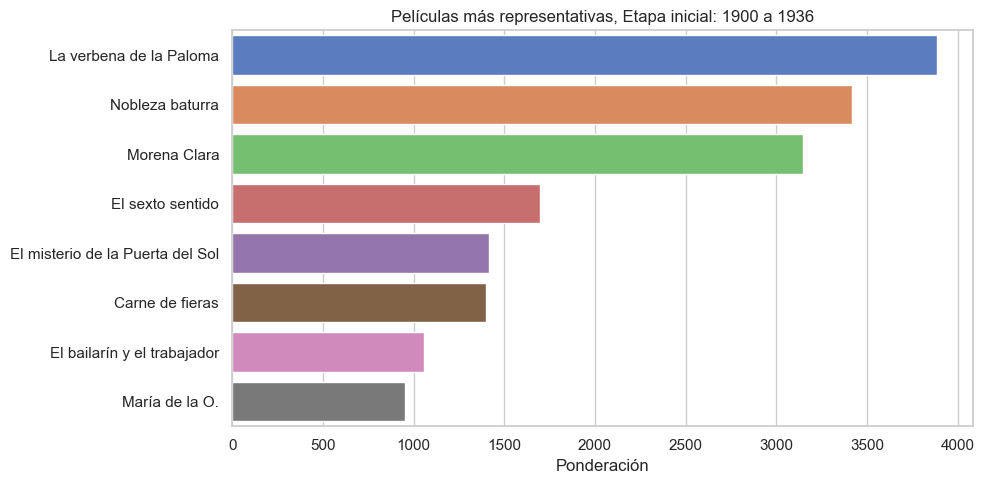

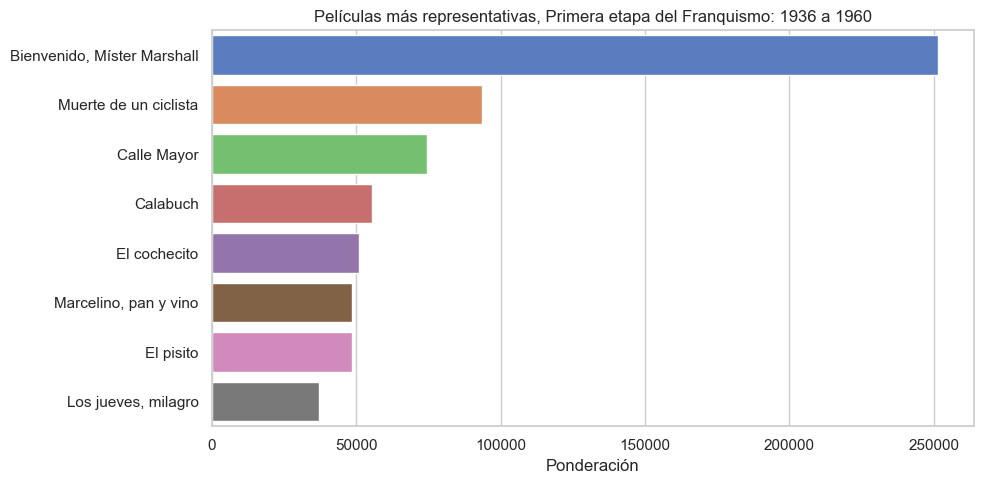

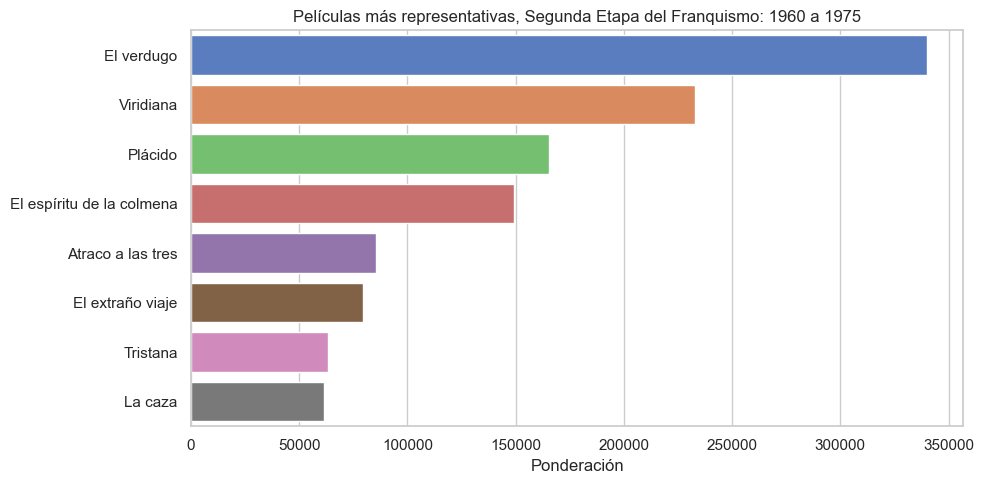

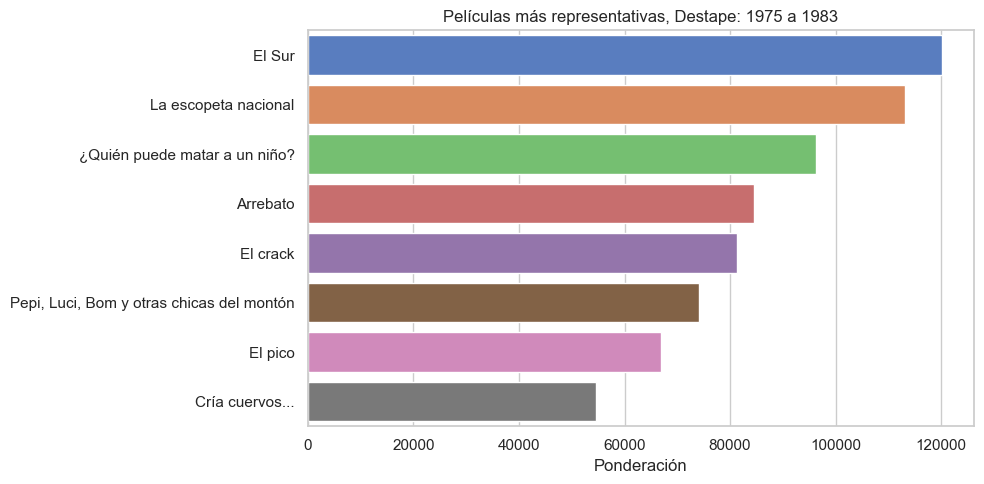

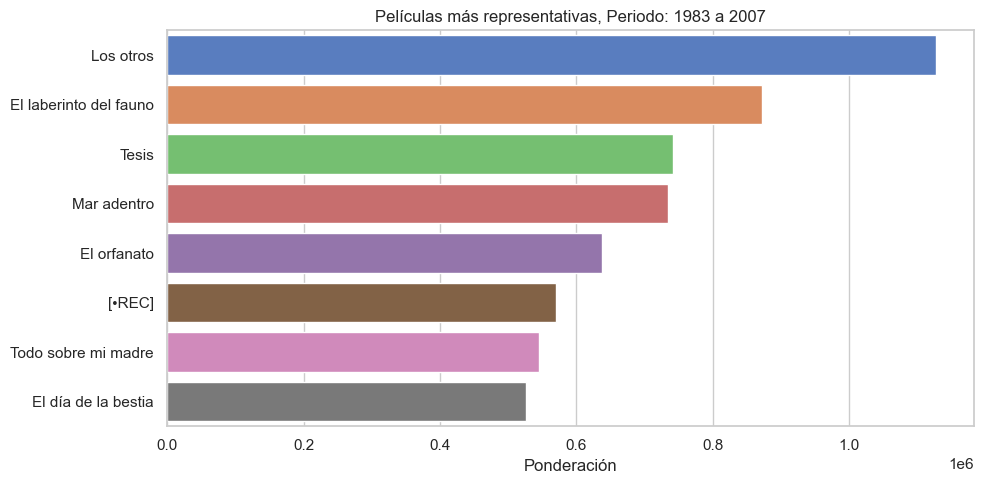

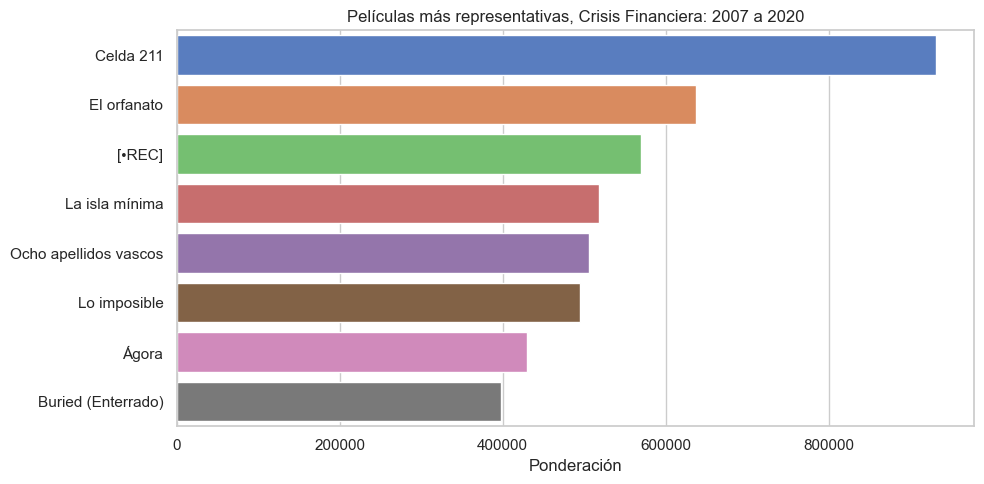

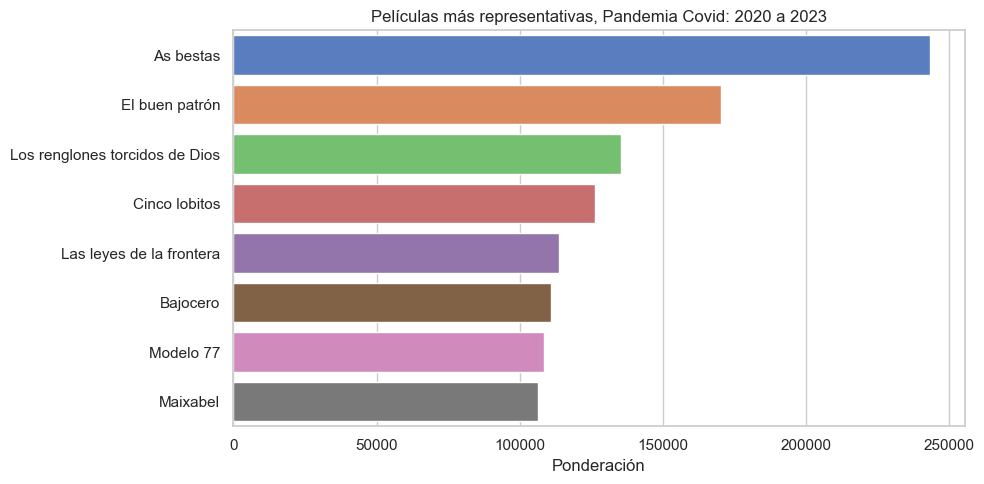

In [12]:
# Configurar el estilo de las gráficas
sns.set(style="whitegrid")

# Iteramos sobre cada período para generar una gráfica por cada uno
for inicio, fin, nombre_periodo in periodos:
    # Filtrar las películas de ese período y calcular la ponderación
    peliculas_periodo = df_peliculas_top[df_peliculas_top['Periodo'] == nombre_periodo]
    
    # Crear una nueva figura para cada gráfica
    plt.figure(figsize=(10, 5))
    
    # Crear el gráfico de barras para el período actual
    sns.barplot(x='Ponderacion', y='Título', data=peliculas_periodo, palette="muted")
    
    # Establecer el título para el período actual
    plt.title(f"Películas más representativas, {nombre_periodo}")
    plt.xlabel("Ponderación")
    plt.ylabel("")
    
    # Ajustar el layout y mostrar la gráfica
    plt.tight_layout()
    plt.show()
